In [1]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import warnings
from wordcloud import WordCloud
from collections import Counter

# Mengabaikan warning yang tidak perlu
warnings.filterwarnings('ignore')

# Setting untuk visualisasi yang lebih baik
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')


# 1. Load dan Inspeksi Data

In [3]:
# Load dataset
print("1. Loading data...")
df = pd.read_csv('netflix_titles.csv')

# Menampilkan informasi dasar tentang dataset
print("2. Informasi dasar tentang dataset:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("Lima baris pertama:")
df.head()

1. Loading data...
2. Informasi dasar tentang dataset:
Jumlah baris: 8807
Jumlah kolom: 12
Lima baris pertama:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Informasi detail tentang dataset
print("Informasi tipe data:")
df.info()

Informasi tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Statistik deskriptif
print("Statistik deskriptif:")
df.describe()

Statistik deskriptif:


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Penjelasan Matematis: Statistik Deskriptif

Statistik deskriptif menggunakan beberapa konsep matematika dasar:

1. **Mean (Rata-rata)**:
   - Formula: $ar{x} =
rac{1}{n}\sum_{i=1}^{n}x_i$
   - Di mana $x_i$ adalah nilai data ke-i dan $n$ adalah jumlah data
   - Contoh: Untuk release_year, mean = jumlah semua tahun rilis / jumlah baris data

2. **Standard Deviation (Standar Deviasi)**:
   - Formula: $\sigma = \sqrt{
rac{1}{n}\sum_{i=1}^{n}(x_i - ar{x})^2}$
   - Mengukur sebaran data dari nilai rata-rata
   - Nilai std yang tinggi menunjukkan data lebih tersebar

3. **Minimum dan Maximum**:
   - Min: nilai terkecil dalam dataset untuk setiap kolom
   - Max: nilai terbesar dalam dataset untuk setiap kolom

4. **Percentiles/Quartiles**:
   - 25% (Q1): Nilai di mana 25% data berada di bawah nilai ini
   - 50% (Q2/median): Nilai tengah data
   - 75% (Q3): Nilai di mana 75% data berada di bawah nilai ini
   - Formula Median:
     - Jika n ganjil: nilai ke-$
rac{n+1}{2}$

     - Jika n genap: rata-rata dari nilai ke-$
rac{n}{2}$ dan nilai ke-$(
rac{n}{2}+1)$

# 2. Analisis Missing Values

In [6]:
# Memeriksa nilai yang hilang (missing values)
print("3. Analisis missing values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Missing Values', 'Percent']
missing_data[missing_data['Missing Values'] > 0].sort_values('Percent', ascending=False)

3. Analisis missing values:


,Missing Values,Percent
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064


# Penjelasan Matematis: Analisis Missing Values

1. **Menghitung Jumlah Missing Values**:
   - Menggunakan fungsi isnull() untuk menandai nilai yang hilang dengan True (1) dan nilai yang ada dengan False (0)
   - Kemudian menjumlahkannya dengan sum() untuk mendapatkan total missing values per kolom
   - Formula: $	ext{Missing Values} = \sum_{i=1}^{n} \mathbb{1}_{\{x_i 	ext{ is null}\}}$
   - Di mana $\mathbb{1}$ adalah fungsi indikator yang bernilai 1 jika kondisi terpenuhi dan 0 jika tidak

2. **Menghitung Persentase Missing Values**:
   - Formula: $	ext{Missing Percent} =
rac{	ext{Missing Values}}{	ext{Total Rows}} 	imes 100\%$
   - Contoh: Jika kolom 'director' memiliki 10 missing values dari 100 baris, maka persentasenya adalah (10/100)*100% = 10%

3. **Sorting Berdasarkan Persentase**:
   - Menggunakan algoritma pengurutan (sorting) untuk mengurutkan kolom berdasarkan persentase missing values
   - Parameter ascending=False mengurutkan dari terbesar ke terkecil (descending)

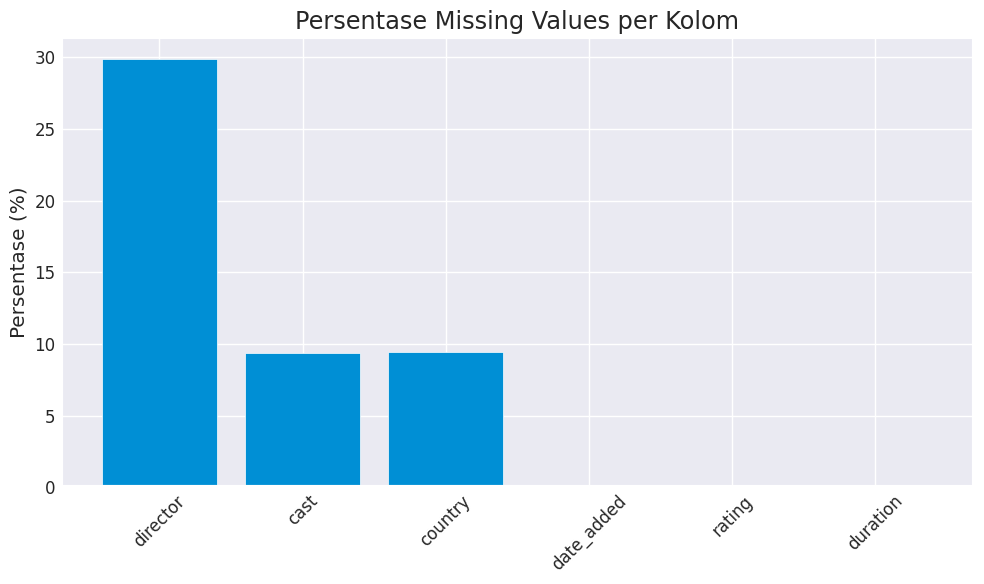

In [7]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
plt.title('Persentase Missing Values per Kolom')
plt.bar(missing_data[missing_data['Missing Values'] > 0].index,
        missing_data[missing_data['Missing Values'] > 0]['Percent'])
plt.xticks(rotation=45)
plt.ylabel('Persentase (%)')
plt.tight_layout()
plt.show()

# 3. Feature Engineering
3.1. Ekstraksi Informasi Tanggal

In [8]:
# Ekstraksi tahun dan bulan dari date_added
print("- Mengekstrak tahun dan bulan dari tanggal penambahan...")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_month_name'] = df['date_added'].dt.month_name()

# Tampilkan hasil ekstraksi
df[['date_added', 'added_year', 'added_month', 'added_month_name']].head()

- Mengekstrak tahun dan bulan dari tanggal penambahan...


,date_added,added_year,added_month,added_month_name
0,2021-09-25,2021.0,9.0,September
1,2021-09-24,2021.0,9.0,September
2,2021-09-24,2021.0,9.0,September
3,2021-09-24,2021.0,9.0,September
4,2021-09-24,2021.0,9.0,September


# Penjelasan Matematis: Ekstraksi Informasi Tanggal

1. Konversi String ke Datetime**:
  - Menggunakan fungsi `pd.to_datetime()` untuk mengubah string tanggal menjadi objek datetime
  - Parameter `errors='coerce'` mengubah tanggal yang tidak valid menjadi NaT (Not a Time)
  - Secara matematis, ini adalah fungsi pemetaan $f: 	ext{String}
ightarrow 	ext{Datetime}$

2. Ekstraksi Komponen Tanggal**:
  - Menggunakan property `.dt` untuk mengakses fitur datetime dari Series pandas
  - **Ekstraksi Tahun**: Fungsi pemetaan $f_{year}(	ext{date}) = 	ext{year component of date}$
  - **Ekstraksi Bulan (angka)**: Fungsi pemetaan $f_{month}(	ext{date}) = 	ext{month component of date}$ (1-12)
  - **Ekstraksi Nama Bulan**: Fungsi pemetaan $f_{month\_name}(	ext{date}) = 	ext{name of month component}$

3. Transformasi Data**:
  - Dari single feature (date_added) menjadi multiple features (added_year, added_month, added_month_name)
  - Ini adalah contoh dari "feature expansion" dalam feature engineering
  - Secara matematis: $\mathbf{X} \in \mathbb{R}^{n 	imes 1}
ightarrow \mathbf{X'} \in \mathbb{R}^{n 	imes 3}$

3.2. Ekstraksi Informasi Durasi

In [9]:
# Ekstraksi informasi dari duration
print("- Mengekstrak informasi dari durasi...")
def extract_duration_value(duration_str):
    """Mengekstrak nilai numerik dari string durasi"""
    if pd.isna(duration_str):
        return np.nan
    match = re.search(r'(\d+)', duration_str)
    if match:
        return int(match.group(1))
    return np.nan

def extract_duration_unit(duration_str):
    """Mengekstrak unit (Minutes atau Seasons) dari string durasi"""
    if pd.isna(duration_str):
        return np.nan
    if 'Season' in duration_str:
        return 'Seasons'
    else:
        return 'Minutes'

df['duration_value'] = df['duration'].apply(extract_duration_value)
df['duration_unit'] = df['duration'].apply(extract_duration_unit)

# Tampilkan hasil ekstraksi
df[['duration', 'duration_value', 'duration_unit']].head(10)

- Mengekstrak informasi dari durasi...


,duration,duration_value,duration_unit
0,90 min,90.0,Minutes
1,2 Seasons,2.0,Seasons
2,1 Season,1.0,Seasons
3,1 Season,1.0,Seasons
4,2 Seasons,2.0,Seasons
5,1 Season,1.0,Seasons
6,91 min,91.0,Minutes
7,125 min,125.0,Minutes
8,9 Seasons,9.0,Seasons
9,104 min,104.0,Minutes


1. Regular Expression (Regex)**:
   - Pattern matching dengan regex `r'(\d+)'` untuk mengekstrak angka dari string
   - Secara matematis, ini adalah penerapan dari teori otomata dan bahasa formal
   - Pattern `\d+` menggunakan konsep kuantifikasi untuk mencocokkan satu atau lebih digit
   - Regex menggunakan Deterministic Finite Automaton (DFA) untuk pattern matching

2. Fungsi Ekstraksi Nilai Durasi**:
   - Fungsi pemetaan: $f_{value}: 	ext{String}
ightarrow \mathbb{R} \cup \{NaN\}$
   - Untuk string "90 min", fungsi mengembalikan angka 90
   - Untuk string "2 Seasons", fungsi mengembalikan angka 2
   - Untuk nilai null, fungsi mengembalikan NaN

3. Fungsi Ekstraksi Unit Durasi**:
   - Fungsi pemetaan: $f_{unit}: 	ext{String}
ightarrow \{"Minutes", "Seasons", NaN\}$
   - Menggunakan conditional logic: jika teks mengandung "Season", maka unit adalah "Seasons", jika tidak maka "Minutes"
   - Secara matematis, ini adalah fungsi kondisional:
\[
f_{\text{unit}}(s) =
\begin{cases}
\text{NaN} & \text{jika } s \text{ adalah NaN} \\
\text{"Seasons"} & \text{jika "Season" } \in s \\
\text{"Minutes"} & \text{selainnya}
\end{cases}
\]

4. Operasi Apply pada DataFrame**:
   - Menggunakan fungsi `apply()` untuk menerapkan transformasi ke setiap elemen dalam Series
   - Ini adalah operasi pemetaan elemen-bijak (element-wise mapping): $y_i = f(x_i)$ untuk setiap $i$
   - Transformasi 1 kolom (duration) menjadi 2 kolom (duration_value dan duration_unit)

3.3. Ekstraksi Jumlah Pengarang dan Aktor

In [10]:
# Ekstraksi jumlah director dan cast
print("- Mengekstrak jumlah director dan cast...")
df['director_count'] = df['director'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(', ')))
df['cast_count'] = df['cast'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(', ')))

# Tampilkan hasil ekstraksi
df[['director', 'director_count', 'cast', 'cast_count']].head()

- Mengekstrak jumlah director dan cast...


,director,director_count,cast,cast_count
0,Kirsten Johnson,1,NaN,0
1,NaN,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",19
2,Julien Leclercq,1,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",9
3,NaN,0,NaN,0
4,NaN,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",8


# Ekstraksi Jumlah Director dan Cast

1. String Splitting**:
   - Menggunakan fungsi `split(', ')` untuk memecah string berdasarkan delimiter ", "
   - Hasil dari operasi split adalah list/array: $	ext{split}(s, d) = [s_1, s_2, ..., s_n]$ di mana $s$ adalah string yang dipisahkan oleh delimiter $d$

2. Counting Elements**:
   - Menggunakan fungsi `len()` untuk menghitung jumlah elemen dalam list hasil split
   - Cardinality dari set: $|	ext{split}(s, d)| = n$, jumlah elemen dalam array hasil split

3. Lambda Function**:
   - Menggunakan fungsi anonim (lambda) untuk operasi kondisional
   - Formula umum:
   $\[f(x) = \begin{cases}0 & \text{jika } x \text{ adalah NaN} \\|\text{split}(\text{str}(x), ", ")| & \text{selainnya}\end{cases}\]$

4. Aplikasi pada DataFrame**:
   - Menggunakan fungsi `apply()` untuk menerapkan transformasi ke setiap elemen dalam Series
   - Menghasilkan kolom baru yang berisi jumlah numerik (count) dari elemen dalam string yang dipisahkan koma

5. Handling Missing Values**:
   - Menggunakan kondisional `if pd.isna(x)` untuk menangani nilai null/NaN
   - Untuk missing values, count ditetapkan sebagai 0
   - Untuk nilai non-null, dikonversi ke string dengan `str(x)` untuk menangani kasus nilai non-string

3.4. Ekstraksi Jumlah Genre dan Negara

In [11]:
# Ekstraksi jumlah genre (listed_in) dan negara
print("- Mengekstrak jumlah genre dan negara...")
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(', ')))
df['country_count'] = df['country'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(', ')))

# Tampilkan hasil ekstraksi
df[['listed_in', 'genre_count', 'country', 'country_count']].head()

- Mengekstrak jumlah genre dan negara...


,listed_in,genre_count,country,country_count
0,Documentaries,1,United States,1
1,"International TV Shows, TV Dramas, TV Mysteries",3,South Africa,1
2,"Crime TV Shows, International TV Shows, TV Act...",3,NaN,0
3,"Docuseries, Reality TV",2,NaN,0
4,"International TV Shows, Romantic TV Shows, TV ...",3,India,1


# Ekstraksi Jumlah Genre dan Negara

Prinsip yang digunakan sama dengan ekstraksi jumlah director dan cast, tetapi dengan beberapa perbedaan dalam penanganan nilai null:
1. Genre Count:
 - Untuk kolom 'listed_in', kita langsung menghitung jumlah genre tanpa penanganan null khusus
 - Jika ada nilai null, `str(x)` akan mengubahnya menjadi string 'nan', dan `split(', ')` akan menghasilkan array dengan satu elemen, sehingga count = 1
 - Formula: $	ext{genre_count} = |	ext{split}(	ext{str}(	ext{listed_in}), ", ")|$

2. Country Count:
   - Untuk kolom 'country', kita menangani nilai null secara eksplisit, mengembalikan 0 untuk nilai null
   - Formula: \[\text{country\_count} = \begin{cases}0 & \text{jika country adalah NaN} \\|\text{split}(\text{str}(\text{country}), ", ")| & \text{selainnya}\end{cases}\]

3. Perbedaan Pendekatan:
   - Kedua pendekatan valid, tetapi menghasilkan hasil yang berbeda untuk nilai null:
     - Pendekatan genre_count: nilai null menjadi count = 1
     - Pendekatan country_count: nilai null menjadi count = 0
   - Pemilihan pendekatan tergantung pada bagaimana kita ingin memperlakukan nilai null dalam analisis


3.5. Perhitungan Umur Konten

In [12]:
# Perhitungan umur konten
print("- Menghitung umur konten...")
current_year = datetime.now().year
df['content_age'] = current_year - df['release_year']

# Tampilkan hasil perhitungan
df[['title', 'release_year', 'content_age']].head()

- Menghitung umur konten...


,title,release_year,content_age
0,Dick Johnson Is Dead,2020,5
1,Blood & Water,2021,4
2,Ganglands,2021,4
3,Jailbirds New Orleans,2021,4
4,Kota Factory,2021,4


# Perhitungan Umur Konten

1. Operasi Pengurangan Vektor:
   - Kita melakukan operasi pengurangan skalar-vektor: $\mathbf{y} = c - \mathbf{x}$
   - Di mana $c$ adalah skalar (tahun saat ini) dan $\mathbf{x}$ adalah vektor (release_year untuk setiap baris)
   - Hasilnya adalah vektor $\mathbf{y}$ (content_age) dengan dimensi yang sama dengan $\mathbf{x}$

2. Element-wise Operation:
   - Operasi dilakukan secara element-wise pada setiap baris DataFrame
   - Untuk setiap baris $i$: $	ext{content_age}_i = 	ext{current_year} - 	ext{release_year}_i$

3. Interpretasi Matematis:
   - Ini adalah transformasi linear dengan pergeseran (shift): $f(x) = c - x$
   - Secara grafis, ini mencerminkan nilai terhadap sumbu y dan menggesernya naik sebesar $c$
   - Nilai tahun yang lebih besar (lebih baru) menghasilkan umur konten yang lebih kecil, menunjukkan hubungan terbalik (inverse relationship)

4. Jarak pada Garis Waktu:
   - Secara konseptual, umur konten adalah jarak antara dua titik pada garis waktu (timeline)
   - Formula jarak: $d(	ext{current_year}, 	ext{release_year}) = |	ext{current_year} - 	ext{release_year}|$
   - Karena tahun saat ini selalu ≥ tahun rilis, kita bisa menghilangkan nilai absolut: $d = 	ext{current_year} - 	ext{release_year}$

3.6. Klasifikasi Rating menjadi Kategori

In [13]:
# Klasifikasi rating menjadi kategori
print("- Mengklasifikasi rating menjadi kategori...")
# Definisikan fungsi untuk mengategorikan rating
def categorize_rating(rating):
    """Mengategorikan rating menjadi kelompok usia"""
    if pd.isna(rating):
        return 'Unknown'
    elif rating in ['G', 'TV-G']:
        return 'Kids'
    elif rating in ['PG', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']:
        return 'Older Kids'
    elif rating in ['PG-13', 'TV-14']:
        return 'Teens'
    elif rating in ['R', 'TV-MA', 'NC-17', 'UR', 'NR']:
        return 'Adults'
    else:
        return 'Other'

df['rating_category'] = df['rating'].apply(categorize_rating)

# Tampilkan hasil klasifikasi
df[['rating', 'rating_category']].head(10)

- Mengklasifikasi rating menjadi kategori...


,rating,rating_category
0,PG-13,Teens
1,TV-MA,Adults
2,TV-MA,Adults
3,TV-MA,Adults
4,TV-MA,Adults
5,TV-MA,Adults
6,PG,Older Kids
7,TV-MA,Adults
8,TV-14,Teens
9,PG-13,Teens


# Klasifikasi Rating

1. Fungsi Pemetaan (Mapping Function):
   - Kita mendefinisikan fungsi $f: X
ightarrow Y$ di mana:
     - $X$ adalah domain (himpunan nilai rating asli: 'TV-MA', 'PG-13', dll.)
     - $Y$ adalah range (himpunan kategori target: 'Kids', 'Teens', 'Adults', dll.)
   - Secara formal, ini adalah fungsi pemetaan banyak-ke-satu (many-to-one mapping)

2. Partisi Domain:
   - Kita membagi domain $X$ menjadi partisi yang saling eksklusif (disjoint):
     - $X_1 = \{	ext{nilai null/NaN}\}$
     - $X_2 = \{	ext{'G', 'TV-G'}\}$
     - $X_3 = \{	ext{'PG', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV'}\}$
     - $X_4 = \{	ext{'PG-13', 'TV-14'}\}$
     - $X_5 = \{	ext{'R', 'TV-MA', 'NC-17', 'UR', 'NR'}\}$
     - $X_6 = X \setminus (X_1 \cup X_2 \cup X_3 \cup X_4 \cup X_5)$ (semua nilai lainnya)

3. Definisi Fungsi Piecewise:
   - Fungsi kategorisasi didefinisikan secara piecewise:
\[
f(x) =
\begin{cases}
\text{'Unknown'} & \text{jika } x \in X_1 \\
\text{'Kids'} & \text{jika } x \in X_2 \\
\text{'Older Kids'} & \text{jika } x \in X_3 \\
\text{'Teens'} & \text{jika } x \in X_4 \\
\text{'Adults'} & \text{jika } x \in X_5 \\
\text{'Other'} & \text{jika } x \in X_6
\end{cases}
\]
4. Reduksi Dimensi Kategorikal:
   - Secara konseptual, ini adalah reduksi dimensi untuk variabel kategorikal
   - Mengurangi cardinalitas dari variabel kategorikal: $|X| > |Y|$
   - Mengelompokkan nilai serupa menjadi kategori yang lebih umum untuk analisis yang lebih bermakna

5. Aplikasi ke DataFrame:
   - Menggunakan fungsi `apply()` untuk menerapkan transformasi ke setiap elemen dalam Series 'rating'
   - Menghasilkan kolom baru 'rating_category' dengan nilai yang dikelompokkan

3.7. Tampilkan Hasil Feature Engineering

In [14]:
# Tampilkan hasil feature engineering
print("Hasil Feature Engineering (5 baris pertama):")
engineered_features = ['added_year', 'added_month', 'duration_value', 'duration_unit',
                      'director_count', 'cast_count', 'genre_count', 'country_count',
                      'content_age', 'rating_category']
df[engineered_features].head()

Hasil Feature Engineering (5 baris pertama):


,added_year,added_month,duration_value,duration_unit,director_count,cast_count,genre_count,country_count,content_age,rating_category
0,2021.0,9.0,90.0,Minutes,1,0,1,1,5,Teens
1,2021.0,9.0,2.0,Seasons,0,19,3,1,4,Adults
2,2021.0,9.0,1.0,Seasons,1,9,3,0,4,Adults
3,2021.0,9.0,1.0,Seasons,0,0,2,0,4,Adults
4,2021.0,9.0,2.0,Seasons,0,8,3,1,4,Adults


# 4. Penjelasan Komprehensif Matematika untuk Feature Engineering

Feature Engineering menggunakan berbagai konsep dan teknik matematika untuk meningkatkan kualitas data. Berikut adalah penjelasan lengkap tentang konsep matematika yang digunakan dalam feature engineering:

4.1 Ekstraksi Fitur Numerik dari Data Teks

**Teori Himpunan dan Penghitungan**
- String Splitting dan Tokenisasi:
  - Fungsi split mengubah string menjadi array tokenized: $	ext{split}(s, d) = [s_1, s_2, ..., s_n]$
  - Di mana $s$ adalah string input dan $d$ adalah delimiter (separator)
  - Setiap $s_i$ adalah substring (token) yang dihasilkan dari pemisahan

- Penghitungan Elemen (Kardinalitas):
  - Kardinalitas set: $|S| = n$ adalah jumlah elemen dalam set $S$
  - Dalam konteks feature engineering: $	ext{count} = |	ext{split}(	ext{string}, 	ext{delimiter})|$
  - Contoh: Untuk string "Drama, Comedy, Action", jika di-split dengan ", " menghasilkan array ["Drama", "Comedy", "Action"] dengan kardinalitas 3

**Pemrosesan Teks dan Regular Expression**
- Pattern Matching dengan Regex:
  - Regex adalah bahasa formal untuk mencocokkan pola dalam teks
  - Implementasi regex menggunakan Deterministic Finite Automaton (DFA) atau Non-deterministic Finite Automaton (NFA)
  - Pattern `\d+` mencocokkan satu atau lebih digit (0-9)
  - Kompleksitas waktu: $O(nm)$ di mana $n$ adalah panjang teks dan $m$ adalah panjang pattern

- Ekstraksi dengan Grup Capturing:
  - Grup capturing `(\d+)` mengekstrak sub-pattern yang cocok
  - Secara formal, ini adalah fungsi $f(s) = \{t | t 	ext{ adalah substring dari } s 	ext{ yang cocok dengan pattern}\}$

4.2 Perhitungan Umur Konten

**Aljabar Linear dan Vektor**
- Operasi Pengurangan Vektor:
  - Transformasi linear dengan pergeseran: $f(
ec{x}) = c
ec{1} -
ec{x}$
  - Di mana $
ec{1}$ adalah vektor satuan dan $c$ adalah skalar
  - Dalam konteks ini: $
ec{	ext{content_age}} = 	ext{current_year} \cdot
ec{1} -
ec{	ext{release_year}}$

- **Interpretasi Geometris**:
  - Refleksi terhadap titik $
rac{c}{2}$ pada garis bilangan
  - Nilai yang lebih kecil dari $
rac{c}{2}$ menjadi lebih besar dan sebaliknya
  - Misalnya, jika current_year = 2025, maka titik refleksi adalah 1012.5

**Teori Pengukuran**
- Jarak pada Garis Waktu:
  - Metrik jarak: $d(t_1, t_2) = |t_1 - t_2|$
  - Untuk waktu, $t_1 > t_2$ berarti $t_1$ adalah waktu yang lebih baru
  - Umur konten adalah jarak dari waktu rilis ke waktu sekarang: $	ext{age} = d(	ext{now}, 	ext{release_time})$

4.3 Kategorisasi (Mapping)

**Teori Fungsi dan Pemetaan**
- Fungsi Pemetaan:
  - Fungsi $f: X
ightarrow Y$ memetakan setiap elemen $x \in X$ ke tepat satu elemen $y \in Y$
  - Dalam kategorisasi rating, $X$ adalah set rating asli dan $Y$ adalah set kategori
  - Ini adalah pemetaan banyak-ke-satu (many-to-one): beberapa rating berbeda dipetakan ke kategori yang sama

- Partisi Domain:
  - Domain $X$ dipartisi menjadi subset disjoint $X_1, X_2, ..., X_n$ di mana $X = X_1 \cup X_2 \cup ... \cup X_n$ dan $X_i \cap X_j = \emptyset$ untuk $i
eq j$
  - Setiap subset $X_i$ dipetakan ke nilai tertentu $y_i \in Y$

Teori Pengambilan Keputusan
- Fungsi Piecewise:
  - Fungsi yang didefinisikan dengan formula berbeda untuk bagian domain yang berbeda
  - Secara matematis: $f(x) = f_i(x)$ jika $x \in X_i$
  - Dalam konteks kategorisasi rating, setiap $f_i(x)$ adalah fungsi konstanta yang mengembalikan kategori tertentu

4.4 Ekstraksi Pola Menggunakan Regex

# Teori Bahasa Formal
- Regular Expression sebagai Bahasa Formal:
  - Regex mendefinisikan bahasa regular, subset dari bahasa formal
  - Bahasa regular dapat dikenali oleh Finite State Machine (FSM)
  - Pattern `\d+` mendefinisikan bahasa $L = \{w | w 	ext{ terdiri dari satu atau lebih digit}\}$

- Automata dan Komputasi:
  - Pencocokan regex diimplementasikan menggunakan DFA atau NFA
  - Kompleksitas waktu untuk pencocokan dengan DFA: $O(n)$ di mana $n$ adalah panjang string input
  - Regex memiliki ekspresi kompak tetapi powerful untuk mencocokkan pola teks

4.5 Transformasi Data dan Ekspansi Fitur

#Ruang Fitur dan Transformasi
- Ekspansi Dimensi:
  - Dari $\mathbb{R}^n$ ke $\mathbb{R}^m$ di mana $m > n$
  - Dalam feature engineering, kita sering mengekspansi fitur untuk menangkap informasi lebih detail
  - Contoh: Mengubah 1 kolom 'date_added' menjadi 3 kolom ('added_year', 'added_month', 'added_month_name')

- Representasi Data yang Kaya:
  - Mengekstrak informasi implisit menjadi eksplisit
  - Meningkatkan "representational power" dari dataset
  - Memungkinkan model untuk menemukan pola yang sebelumnya sulit terdeteksi

# 5. Exploratory Data Analysis (EDA)
5.1. Distribusi Movie vs TV Show

- Distribusi Movie vs TV Show:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


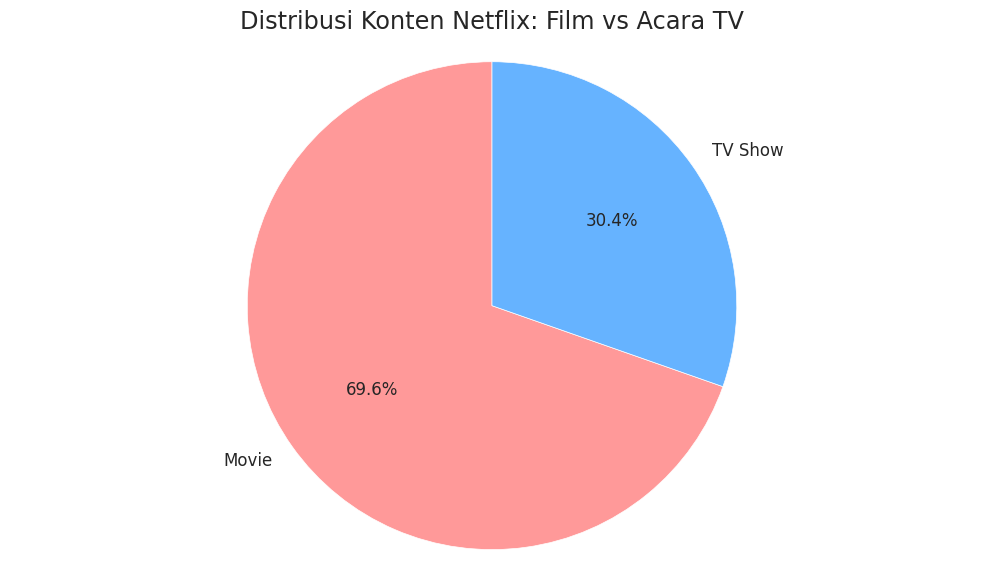

In [15]:
# Distribusi Movie vs TV Show
print("- Distribusi Movie vs TV Show:")
type_counts = df['type'].value_counts()
print(type_counts)

plt.figure(figsize=(10, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Konten Netflix: Film vs Acara TV')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Distribusi Movie vs TV Show

1. Frequency Count dan Distribusi:
   - Menghitung frekuensi kemunculan setiap nilai unik dalam variabel 'type'
   - Secara matematis: $f_i = $ jumlah kemunculan nilai $i$ dalam dataset
   - Formula: $f_i = \sum_{j=1}^{n} \mathbb{1}_{\{x_j = i\}}$ di mana $\mathbb{1}$ adalah fungsi indikator

2. Proporsi dan Persentase:
   - Proporsi untuk kategori $i$: $p_i =
rac{f_i}{\sum_{j} f_j} =
rac{f_i}{n}$ di mana $n$ adalah total observasi
   - Persentase: $	ext{percentage}_i = p_i 	imes 100\%$
   - Dalam konteks pie chart, sudut untuk kategori $i$ adalah $	heta_i = p_i 	imes 360^\circ$

3. Visualisasi dengan Pie Chart:
   - Pie chart merepresentasikan proporsi relatif dengan sektor lingkaran
   - Area sektor: $A_i = \pi r^2 	imes
rac{	heta_i}{360^\circ} = \pi r^2 	imes p_i$
   - Parameter autopct='%1.1f%%' menampilkan persentase dengan 1 angka desimal
   - Parameter axis='equal' memastikan pie chart berbentuk lingkaran sempurna (bukan elips)

5.2. Distribusi Rating

- Distribusi Rating:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


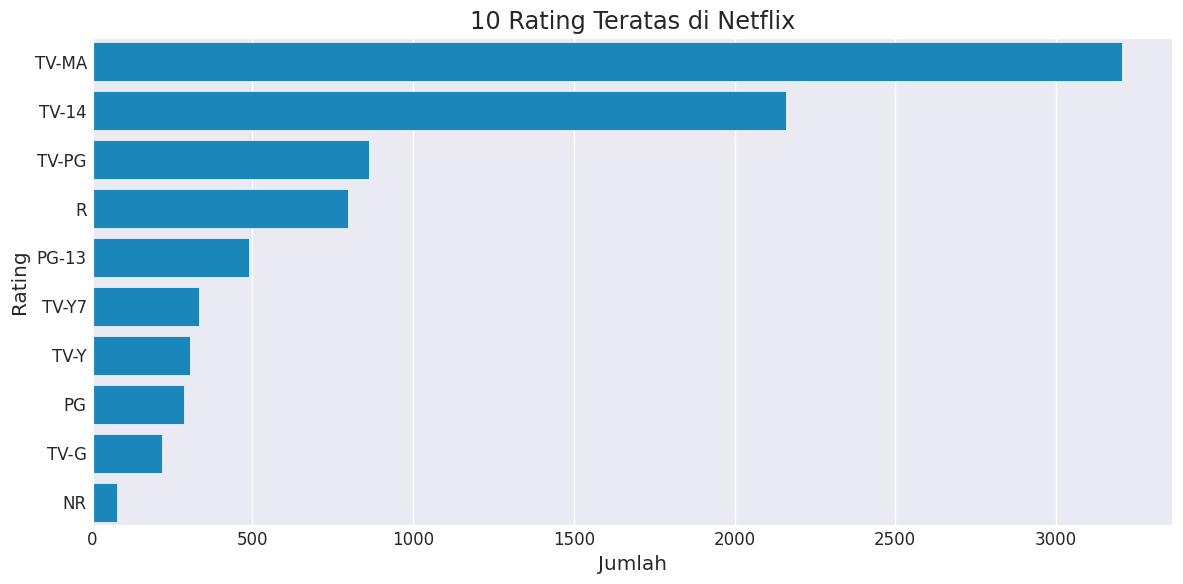

In [16]:
# Distribusi Rating
print("- Distribusi Rating:")
rating_counts = df['rating'].value_counts().head(10)
print(rating_counts)

plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index[:10])
plt.title('10 Rating Teratas di Netflix')
plt.xlabel('Jumlah')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

Distribusi Rating

1. Frequency Table dan Sorting:
   - Frekuensi: $f_i = $ jumlah kemunculan rating $i$ dalam dataset
   - Sorting: Mengurutkan nilai berdasarkan frekuensi dalam urutan menurun (descending)
   - Top-k: Mengambil $k$ nilai teratas (dalam kasus ini, $k = 10$)

2. Bar Chart untuk Categorical Data:
   - Bar chart menampilkan frekuensi untuk setiap kategori
   - Sumbu $y$ menunjukkan kategori (rating)
   - Sumbu $x$ menunjukkan frekuensi (count)
   - Panjang bar proporsional dengan frekuensi: $	ext{length}_i \propto f_i$

3. Ordering Categories by Frequency:
   - Parameter order=df['rating'].value_counts().index[:10] mengatur urutan kategori
   - Urutan kategori berdasarkan frekuensi (dari tertinggi ke terendah)
   - Secara matematis, jika $\pi$ adalah permutasi yang mengurutkan frekuensi secara menurun, maka kategori $i$ ditampilkan pada posisi $\pi(i)$

4. Model Statistik:
   - Bar chart merepresentasikan distribusi empiris dari variabel kategorikal
   - Jika menganggap data sebagai sampel dari populasi, ini adalah estimasi distribusi multinomial
   - Estimasi Maximum Likelihood untuk probabilitas kategori $i$: $\hat{p}_i =
rac{f_i}{n}$

5.3. Distribusi Kategori Rating

- Distribusi Kategori Rating:
rating_category
Adults        4092
Teens         2650
Older Kids    1797
Kids           261
Unknown          4
Other            3
Name: count, dtype: int64


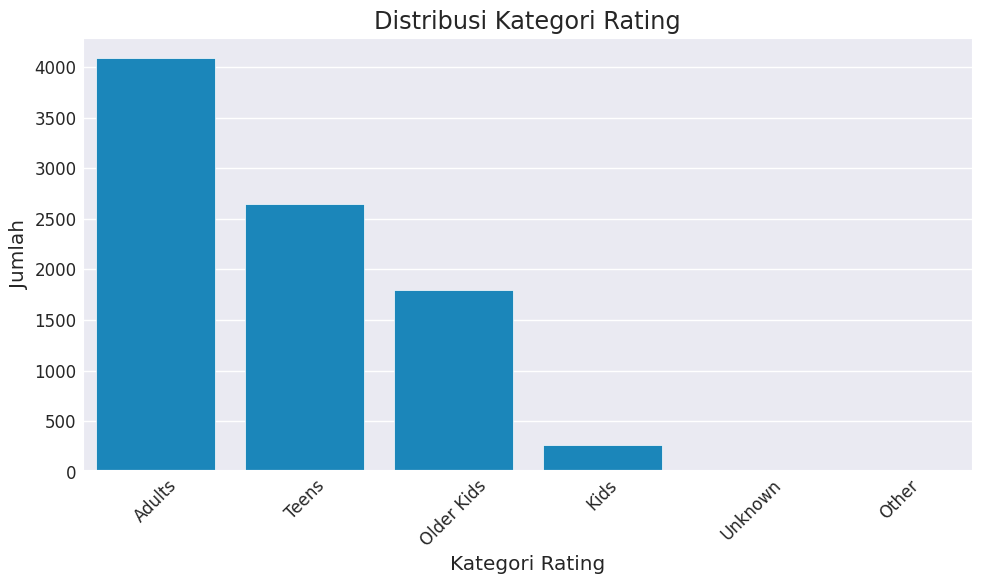

In [17]:
# Distribusi Kategori Rating
print("- Distribusi Kategori Rating:")
rating_category_counts = df['rating_category'].value_counts()
print(rating_category_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='rating_category', data=df, order=df['rating_category'].value_counts().index)
plt.title('Distribusi Kategori Rating')
plt.xlabel('Kategori Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribusi Kategori Rating

1. Agregasi Data Kategorikal:
   - Frekuensi: $f_i = $ jumlah kemunculan kategori rating $i$ dalam dataset
   - Kategori rating adalah hasil dari transformasi pada kolom 'rating' asli
   - Secara matematis, jika $g: X
ightarrow Y$ adalah fungsi kategorisasi rating, frekuensi untuk kategori $y \in Y$ adalah:
     $f_y = \sum_{x \in X} f_x \cdot \mathbb{1}_{\{g(x) = y\}}$

2. Visualisasi dengan Horizontal Bar Chart:
   - Sebuah bar chart dengan sumbu $x$ sebagai kategori dan sumbu $y$ sebagai frekuensi
   - Lebar bar sama dan jarak antar bar konstan, menghasilkan representasi visual yang mudah dibandingkan
   - Tinggi bar proporsional dengan frekuensi: $	ext{height}_i \propto f_i$

3. Efek Kategorisasi:
   - Mengurangi granularitas data: $|Y| < |X|$ (jumlah kategori lebih sedikit daripada jumlah rating asli)
   - Meningkatkan jumlah sampel per kategori: Jika $f_x$ adalah frekuensi rating $x$ dan $g(x) = y$, maka $f_y = \sum_{x: g(x) = y} f_x \geq f_x$
   - Dari perspektif statistik, ini mengurangi varians sampling dengan mengorbankan detail (trade-off bias-variance)

4. Rotasi Label:
   - Parameter rotation=45 memutar label sumbu $x$ sebesar 45 derajat
   - Secara matematis, ini adalah transformasi rotasi pada koordinat teks:
\[
\begin{bmatrix} x' \\ y' \end{bmatrix} =
\begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}
\]
     dengan $	heta = 45^\circ$

5.4. Trend Penambahan Konten per Tahun

- Trend Penambahan Konten per Tahun:
added_year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


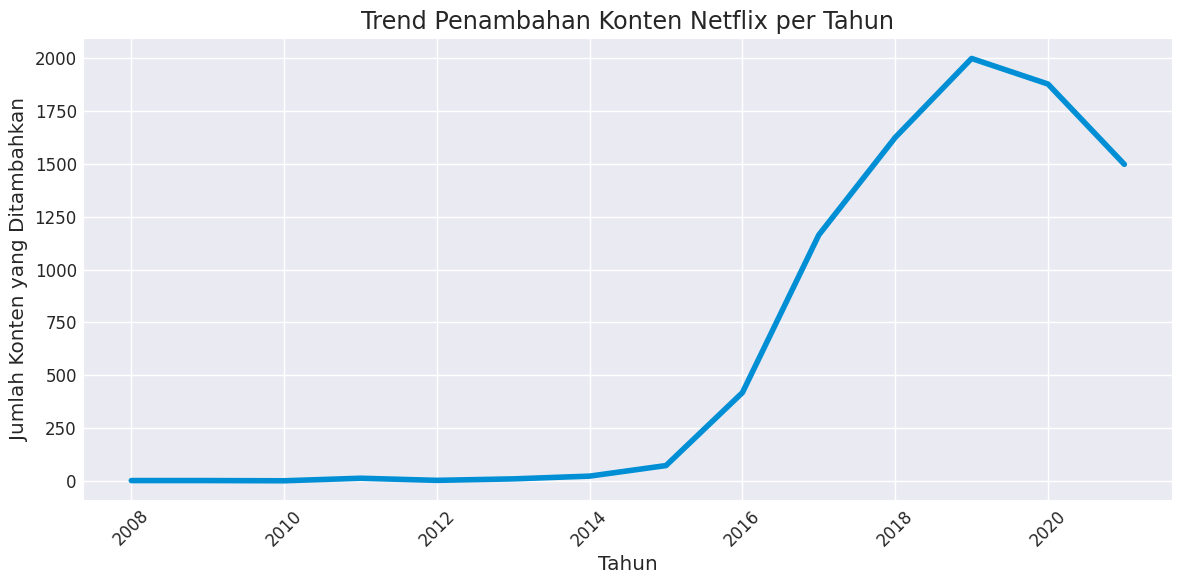

In [18]:
# Trend Penambahan Konten per Tahun
print("- Trend Penambahan Konten per Tahun:")
yearly_additions = df['added_year'].value_counts().sort_index()
print(yearly_additions)

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_additions.index, y=yearly_additions.values)
plt.title('Trend Penambahan Konten Netflix per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten yang Ditambahkan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5.9. Distribusi Jumlah Season untuk TV Show

- Distribusi Jumlah Season untuk TV Show:
duration_value
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
11.0       2
12.0       2
13.0       3
15.0       2
17.0       1
Name: count, dtype: int64


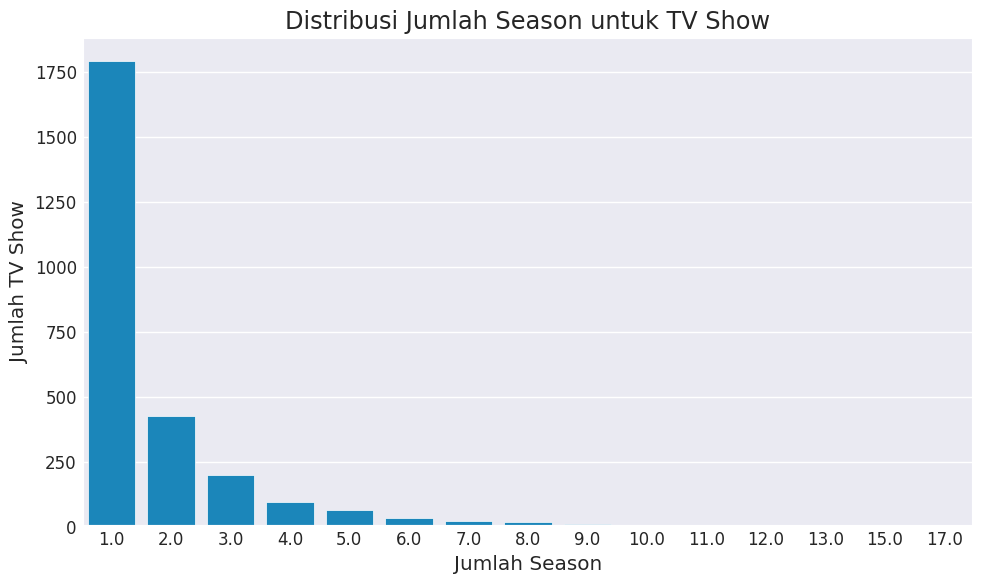

In [19]:
# Distribusi Jumlah Season untuk TV Show
print("- Distribusi Jumlah Season untuk TV Show:")
tvshow_seasons = df[(df['type'] == 'TV Show') & (df['duration_unit'] == 'Seasons')]['duration_value']
print(tvshow_seasons.value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.countplot(x=tvshow_seasons)
plt.title('Distribusi Jumlah Season untuk TV Show')
plt.xlabel('Jumlah Season')
plt.ylabel('Jumlah TV Show')
plt.tight_layout()
plt.show()

# Distribusi Jumlah Season untuk TV Show
1. Discrete Probability Distribution:
   - Jumlah season adalah variabel diskrit yang hanya mengambil nilai integer positif
   - Probability Mass Function (PMF): $P(X = k) =
rac{n_k}{N}$ di mana $n_k$ adalah jumlah TV show dengan $k$ season dan $N$ adalah total TV shows
   - Cumulative Distribution Function (CDF): $F(k) = P(X \leq k) = \sum_{i=1}^{k} P(X = i)$

2. Count Plot untuk Data Diskrit:
   - Count plot adalah bar plot khusus untuk variabel diskrit
   - Setiap bar merepresentasikan frekuensi atau count untuk nilai diskrit tertentu
   - Lebar bar sama untuk semua nilai (berbeda dengan histogram untuk data kontinyu)

3. Filtering Data dengan Multiple Conditions:
   - Menggunakan operasi logical AND (&) untuk menggabungkan dua kondisi
   - Subset data: $D' = \{x \in D | 	ext{type}(x) = 	ext{"TV Show"} 	ext{ AND } 	ext{duration_unit}(x) = 	ext{"Seasons"}\}$
   - Secara teori himpunan, ini adalah intersection dari dua subset: $D' = D_1 \cap D_2$ di mana $D_1$ dan $D_2$ adalah subset yang memenuhi kondisi pertama dan kedua

4. Distribusi Statistik untuk Season Count:
   - Distribusi jumlah season sering mengikuti distribusi power law atau Zipf
   - PMF distribusi Zipf: $P(X = k) \propto k^{-\alpha}$ untuk parameter $\alpha > 1$
   - Dalam konteks TV shows, ini menunjukkan bahwa mayoritas acara TV memiliki sedikit season (1 atau 2), dan sangat sedikit yang bertahan untuk banyak season
   - Fenomena "success breeds success" atau preferential attachment

5.10. Korelasi antara Fitur Numerik

- Korelasi antara Fitur Numerik:
                release_year  added_year  duration_value  director_count  \
release_year        1.000000    0.110473       -0.249182       -0.115403   
added_year          0.110473    1.000000        0.016436       -0.036311   
duration_value     -0.249182    0.016436        1.000000        0.568356   
director_count     -0.115403   -0.036311        0.568356        1.000000   
cast_count         -0.098045    0.127212        0.110206        0.012827   
genre_count        -0.040877    0.048913        0.086543       -0.058240   
country_count      -0.072809   -0.074642        0.151994        0.115165   
content_age        -1.000000   -0.110473        0.249182        0.115403   

                cast_count  genre_count  country_count  content_age  
release_year     -0.098045    -0.040877      -0.072809    -1.000000  
added_year        0.127212     0.048913      -0.074642    -0.110473  
duration_value    0.110206     0.086543       0.151994     0.249182  
di

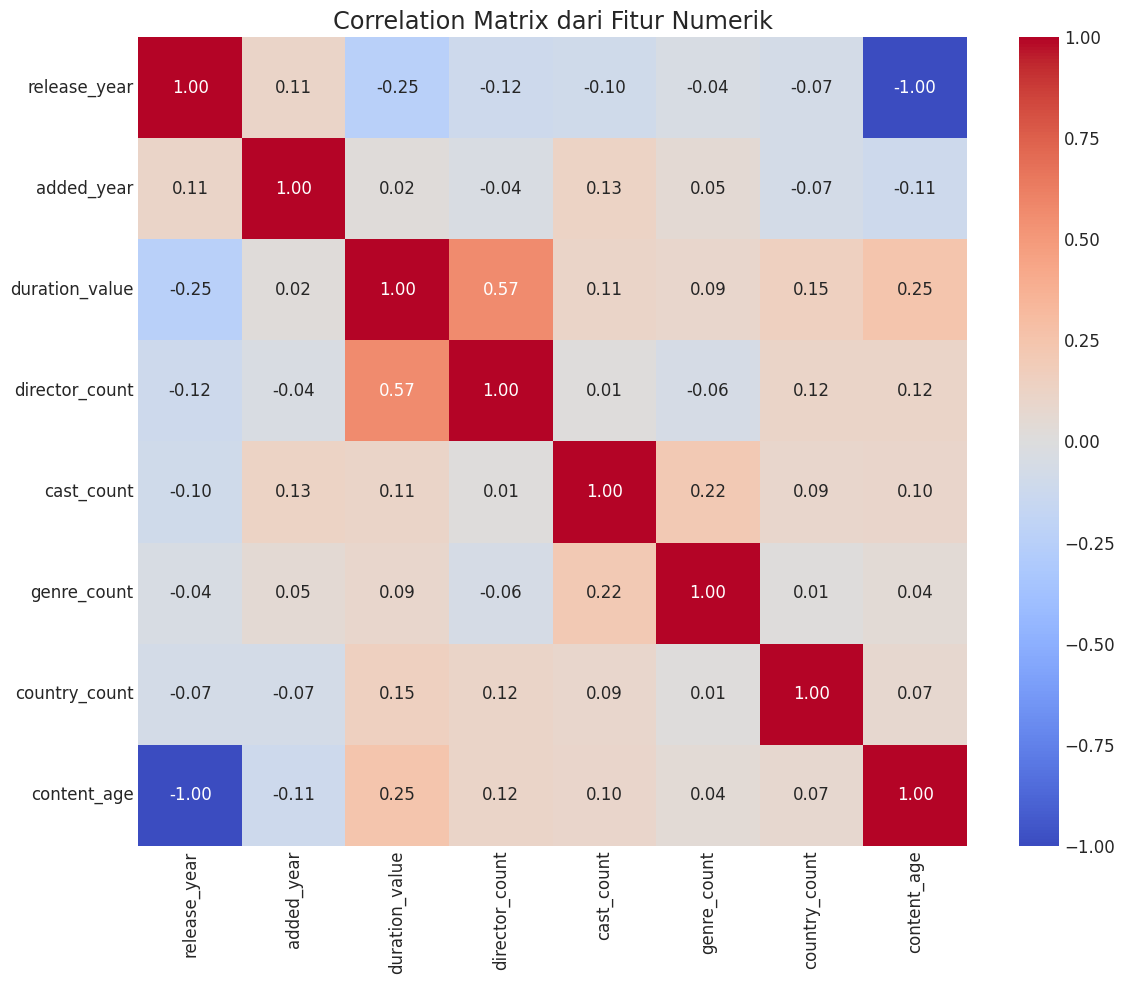

In [20]:
# Korelasi antara Fitur Numerik
print("- Korelasi antara Fitur Numerik:")
numeric_features = ['release_year', 'added_year', 'duration_value',
                   'director_count', 'cast_count', 'genre_count',
                   'country_count', 'content_age']
correlation = df[numeric_features].corr()
print(correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix dari Fitur Numerik')
plt.tight_layout()
plt.show()

#Korelasi antara Fitur Numerik
1. Korelasi Pearson:
   - Mengukur hubungan linear antara dua variabel
   - Formula: $r_{xy} =
rac{\sum_{i=1}^{n} (x_i - ar{x})(y_i - ar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - ar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - ar{y})^2}} =
rac{cov(X,Y)}{\sigma_X \sigma_Y}$
   - Range: $-1 \leq r_{xy} \leq 1$
     - $r_{xy} = 1$: korelasi positif sempurna
     - $r_{xy} = -1$: korelasi negatif sempurna
     - $r_{xy} = 0$: tidak ada korelasi linear

2. Matriks Korelasi:
   - Matriks simetris yang menunjukkan korelasi antara semua pasangan variabel
   - Element $(i,j)$ adalah korelasi antara variabel $i$ dan variabel $j$: $C_{ij} = r_{x_i x_j}$
   - Diagonal utama selalu bernilai 1 (korelasi variabel dengan dirinya sendiri)
   - Properti: $C_{ij} = C_{ji}$ (matriks simetris) dan $C_{ii} = 1$

3. Visualisasi dengan Heatmap:
   - Representasi matriks dalam bentuk visual di mana nilai direpresentasikan oleh warna
   - Colormap 'coolwarm': warna biru untuk korelasi negatif, merah untuk korelasi positif, dan putih untuk korelasi mendekati nol
   - Parameter annot=True menampilkan nilai numerik pada setiap sel
   - Parameter fmt='.2f' memformat nilai menjadi 2 angka desimal

4. Interpretasi Korelasi:
   - Korelasi tinggi antara 'release_year' dan 'added_year': konten yang lebih baru cenderung ditambahkan lebih baru
   - Korelasi negatif antara 'release_year' dan 'content_age': jelas secara definisi, karena content_age = current_year - release_year
   - Korelasi positif antara 'director_count' dan 'cast_count': konten dengan banyak sutradara cenderung memiliki banyak aktor
   - Korelasi adalah indikator hubungan, bukan kausalitas: "correlation does not imply causation"

5. Statistik Inferensial:
   - Uji signifikansi untuk korelasi: $H_0:
ho = 0$ vs $H_1:
ho
eq 0$
   - t-statistic: $t =
rac{r\sqrt{n-2}}{\sqrt{1-r^2}}$ dengan $df = n-2$
   - P-value menunjukkan signifikansi statistik dari korelasi yang diamati

5.11. Word Cloud untuk Judul

- Word Cloud untuk Judul:


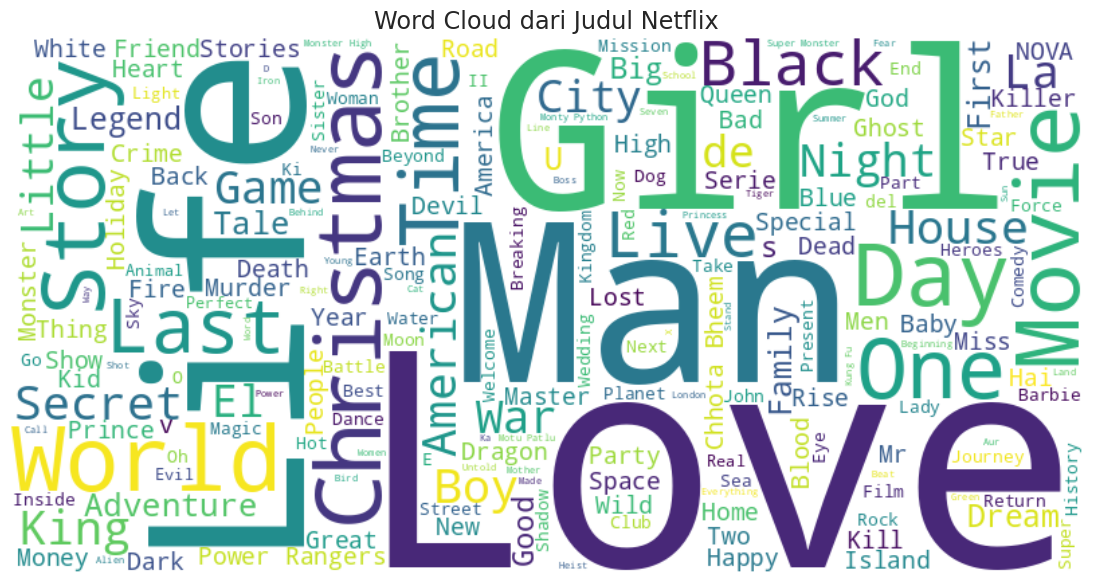

In [21]:
# Word Cloud untuk Judul
print("- Word Cloud untuk Judul:")
titles_text = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Judul Netflix')
plt.tight_layout()
plt.show()

# Word Cloud untuk Judul (Lanjutan)
3. Algoritma Layout Word Cloud:
   - Problem: Menempatkan kata-kata pada canvas 2D dengan ukuran proporsional dengan frekuensi dan tanpa tumpang tindih
   - Algoritma dasar: Greedy algorithm dengan heuristik placement
   - Spiral placement: Mencoba menempatkan kata pada spiral yang berawal dari pusat
   - Collision detection: Algoritma pengecekan tumpang tindih antar kata
   - Kompleksitas waktu: $O(n^2)$ di mana $n$ adalah jumlah kata unik

4. Visualisasi Teks dalam Ruang 2D:
   - Mapping dari term frequency ke atribut visual:
     - Frekuensi → ukuran font: $	ext{font_size}_w = f_{min} + (f_{max} - f_{min}) \cdot
rac{f_w - f_{min}}{f_{max} - f_{min}}$ (linear scaling)
     - Posisi: $(x_w, y_w)$ ditentukan oleh algoritma layout
   - Rendering teks dengan font yang dapat diubah ukurannya (scalable fonts)
   - Parameter interpolasi: 'bilinear' menggunakan interpolasi bilinear untuk smoothing

5.12. Word Cloud untuk Deskripsi

- Word Cloud untuk Deskripsi:


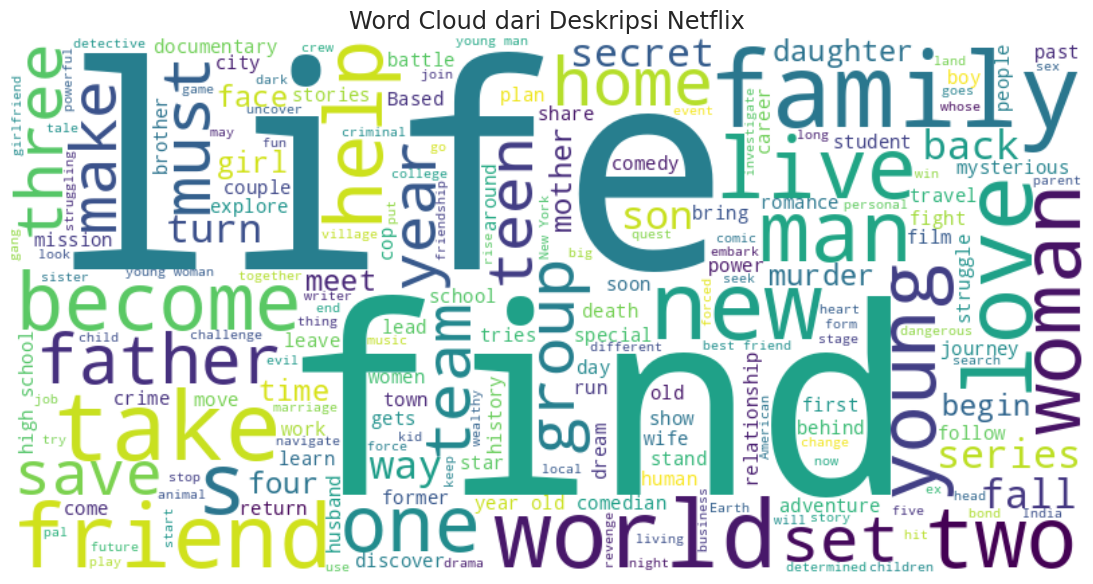

In [22]:
# Word Cloud untuk Deskripsi
print("- Word Cloud untuk Deskripsi:")
descriptions_text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Deskripsi Netflix')
plt.tight_layout()
plt.show()

# Word Cloud untuk Deskripsi
1. Natural Language Processing (NLP):
   - Text preprocessing: case folding, stopword removal, stemming/lemmatization
   - Bag-of-Words (BoW) model: Teks direpresentasikan sebagai multiset kata, mengabaikan tata bahasa dan urutan
   - Dalam model BoW, dokumen $d$ direpresentasikan sebagai vektor $
ec{d} = (f_1, f_2, ..., f_n)$ di mana $f_i$ adalah frekuensi kata ke-$i$ dalam dokumen

2. Information Retrieval dan Analisis Teks:
   - Term Frequency (TF): $	ext{TF}(t, d) =
rac{f_{t,d}}{\sum_{s} f_{s,d}}$ (frekuensi relatif term $t$ dalam dokumen $d$)
   - Inverse Document Frequency (IDF): $	ext{IDF}(t) = \log
rac{N}{n_t}$ di mana $N$ adalah jumlah dokumen dan $n_t$ adalah jumlah dokumen yang mengandung term $t$
   - TF-IDF: $	ext{TF-IDF}(t, d) = 	ext{TF}(t, d) 	imes 	ext{IDF}(t)$ (menilai pentingnya kata dalam dokumen relatif terhadap korpus)

3. Distribusi Zipf dalam Teks Natural:
   - Hukum Zipf: Frekuensi kata berbanding terbalik dengan rankingnya dalam daftar frekuensi
   - Formula: $f_r \propto
rac{1}{r^a}$ di mana $f_r$ adalah frekuensi kata dengan ranking $r$ dan $a$ adalah parameter (biasanya mendekati 1)
   - Konsekuensi: Beberapa kata sangat umum, sebagian besar kata sangat jarang (distribusi "long tail")

4. Analisis Sentimen dan Emosi:
   - Word cloud dapat mengungkapkan tema dan sentimen dominan dalam deskripsi konten
   - Kata-kata seperti "life", "family", "love" yang menonjol menunjukkan tema umum dalam konten Netflix
   - Analisis emosi: Mengkategorikan kata-kata ke dalam kategori emosi (senang, sedih, takut, marah, dll.)
   - Polaritas sentimen: Skor sentimen $s = \sum_{w \in d} f_w \cdot p_w$ di mana $p_w$ adalah polaritas kata $w$ (positif, negatif, atau netral)

5.13. Distribusi Konten per Bulan Penambahan

- Distribusi Konten per Bulan Penambahan:
added_month_name
January      727
February     557
March        734
April        759
May          626
June         724
July         819
August       749
September    765
October      755
November     697
December     797
Name: count, dtype: int64


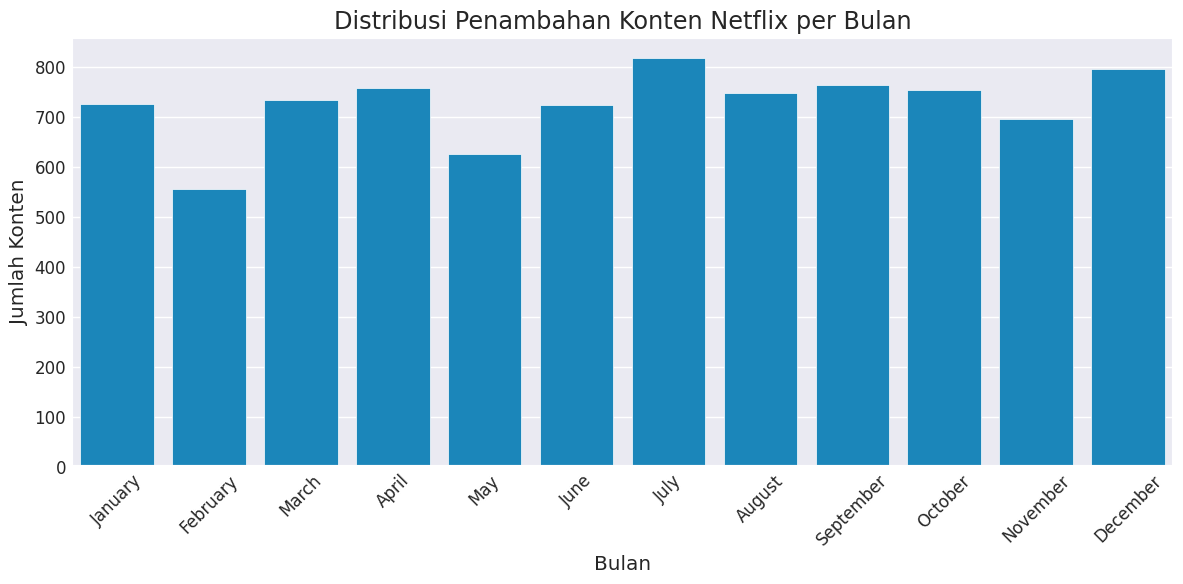

In [23]:
# Distribusi Konten per Bulan Penambahan
print("- Distribusi Konten per Bulan Penambahan:")
monthly_additions = df['added_month_name'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                                                'July', 'August', 'September', 'October', 'November', 'December'])
print(monthly_additions)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values)
plt.title('Distribusi Penambahan Konten Netflix per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribusi Konten per Bulan Penambahan
1. **Time Series Analysis dengan Seasonal Component**:
   - Time series $Y_t$ dapat dipecah menjadi komponen: $Y_t = T_t + S_t + C_t + \epsilon_t$
     - $T_t$: Trend component (perubahan jangka panjang)
     - $S_t$: Seasonal component (pola berulang dengan periode tetap)
     - $C_t$: Cyclical component (fluktuasi non-periodik)
     - $\epsilon_t$: Residual/error component (noise acak)
   - Dalam analisis ini, kita fokus pada komponen musiman $S_t$ dengan periode 12 bulan

2. **Reordering Categorical Variables**:
   - Categorical reindexing: Mengatur ulang indeks kategori untuk mengikuti urutan yang bermakna (kronologis)
   - Fungsi reindex() memetakan urutan baru: ['January', 'February', ..., 'December']
   - Secara matematika, ini adalah permutasi $\pi$ pada set kategori: $[c_{\pi(1)}, c_{\pi(2)}, ..., c_{\pi(n)}]$
   - Tanpa reindexing, kategori akan diurutkan berdasarkan frekuensi atau alfabet, yang tidak menunjukkan urutan kronologis

3. **Seasonality Pattern dan Periodicity**:
   - Pola musiman: Variasi yang berulang dengan periode tetap (dalam hal ini, 12 bulan)
   - Autocorrelation pada lag $k$: $r_k =
rac{\sum_{t=k+1}^{n} (y_t - ar{y})(y_{t-k} - ar{y})}{\sum_{t=1}^{n} (y_t - ar{y})^2}$
   - Untuk data seasonal dengan periode $p$, autocorrelation pada lag $p$ cenderung tinggi: $r_p \approx 1$
   - Periode dapat diidentifikasi dari autocorrelation function (ACF) plot

4. **Business Interpretation**:
   - Variasi bulanan dapat dipengaruhi oleh strategi rilis konten, permintaan musiman, atau siklus produksi
   - Seasonal index untuk bulan $m$: $SI_m =
rac{ar{y}_m}{ar{y}}$ di mana $ar{y}_m$ adalah rata-rata untuk bulan $m$ dan $ar{y}$ adalah grand mean
   - Bulan dengan $SI_m > 1$ memiliki aktivitas di atas rata-rata, bulan dengan $SI_m < 1$ memiliki aktivitas di bawah rata-rata

5.14. Distribusi Type (Movie/TV Show) berdasarkan Rating Category


- Distribusi Type (Movie/TV Show) berdasarkan Rating Category:
type             Movie  TV Show
rating_category                
Adults            2940     1152
Kids               167       94
Older Kids        1102      695
Other                3        0
Teens             1917      733
Unknown              2        2


<Figure size 1200x600 with 0 Axes>

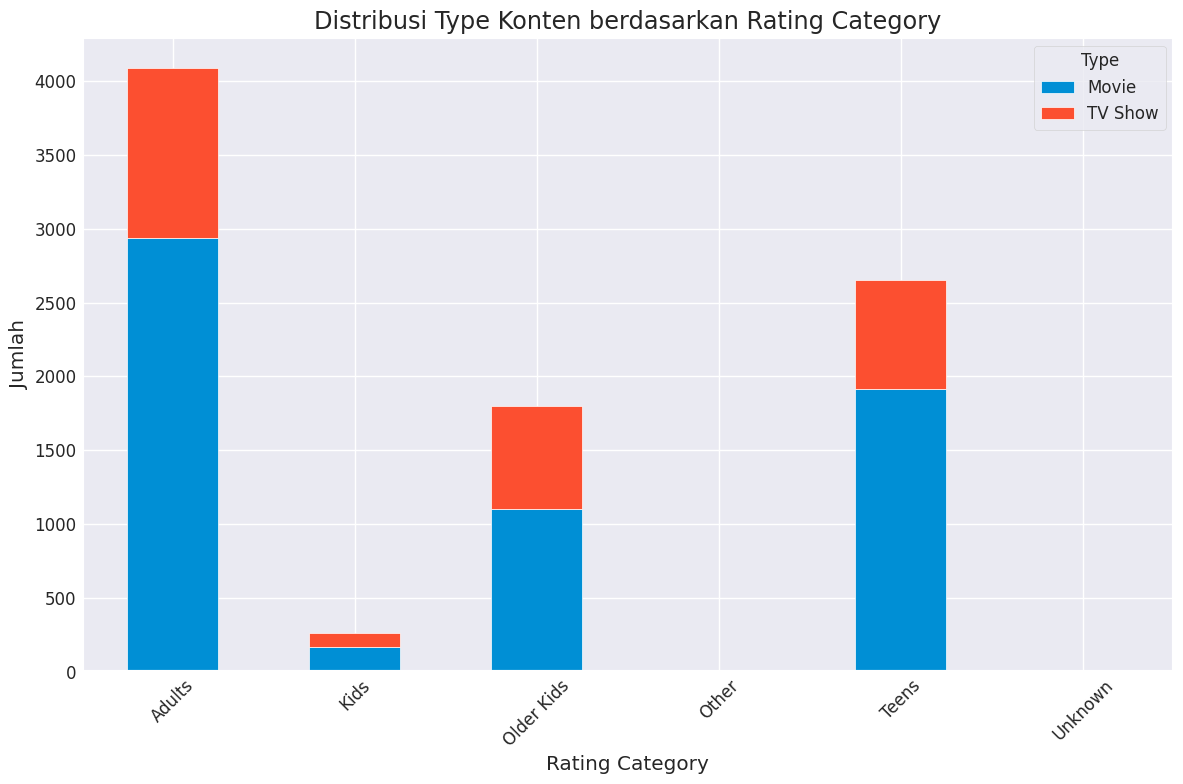

In [24]:
# Distribusi Type (Movie/TV Show) berdasarkan Rating Category
print("- Distribusi Type (Movie/TV Show) berdasarkan Rating Category:")
content_by_rating = pd.crosstab(df['rating_category'], df['type'])
print(content_by_rating)

plt.figure(figsize=(12, 6))
content_by_rating.plot(kind='bar', stacked=True)
plt.title('Distribusi Type Konten berdasarkan Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# Distribusi Type berdasarkan Rating Category

1. **Contingency Table dan Cross-Tabulation**:
   - Tabel kontingensi: Tabel frekuensi dua arah untuk dua variabel kategori
   - Element $(i,j)$ adalah count untuk kombinasi kategori $i$ dari variabel baris dan kategori $j$ dari variabel kolom
   - Formula: $n_{ij} = \sum_{k=1}^{N} \mathbb{1}_{\{X_k = i 	ext{ dan } Y_k = j\}}$ di mana $X$ adalah rating_category dan $Y$ adalah type
   - Row sums: $n_{i\cdot} = \sum_{j} n_{ij}$ (total untuk kategori $i$ dari variabel baris)
   - Column sums: $n_{\cdot j} = \sum_{i} n_{ij}$ (total untuk kategori $j$ dari variabel kolom)

2. **Stacked Bar Chart**:
   - Menampilkan distribusi variabel kategori (type) untuk setiap nilai variabel kategori lainnya (rating_category)
   - Tinggi total bar: $h_i = \sum_{j} n_{ij} = n_{i\cdot}$ (jumlah konten untuk rating category $i$)
   - Tinggi segment untuk type $j$ dalam bar rating category $i$: $h_{ij} = n_{ij}$
   - Proporsi type $j$ dalam rating category $i$: $p_{j|i} =
rac{n_{ij}}{n_{i\cdot}}$

3. **Chi-Square Test untuk Independensi**:
   - Null hypothesis $H_0$: Variabel rating_category dan type adalah independen
   - Expected frequencies under $H_0$: $E_{ij} =
rac{n_{i\cdot} 	imes n_{\cdot j}}{N}$
   - Chi-square statistic: $\chi^2 = \sum_{i} \sum_{j}
rac{(n_{ij} - E_{ij})^2}{E_{ij}}$
   - Degrees of freedom: $df = (r-1)(c-1)$ di mana $r$ adalah jumlah baris dan $c$ adalah jumlah kolom
   - Jika $\chi^2 > \chi^2_{\alpha, df}$, kita menolak $H_0$ dan menyimpulkan bahwa variabel-variabel tersebut tidak independen

4. **Cramér's V untuk Kekuatan Asosiasi**:
   - Mengukur kekuatan asosiasi antara dua variabel kategori
   - Formula: $V = \sqrt{
rac{\chi^2/N}{\min(r-1, c-1)}}$
   - Range: $0 \leq V \leq 1$ di mana 0 berarti tidak ada asosiasi dan 1 berarti asosiasi sempurna
   - Interpretasi: $V < 0.1$ (asosiasi lemah), $0.1 \leq V < 0.3$ (asosiasi sedang), $V \geq 0.3$ (asosiasi kuat)

5.15. Rata-rata Umur Konten per Type

- Rata-rata Umur Konten per Type:
type
Movie      11.878486
TV Show     8.394245
Name: content_age, dtype: float64


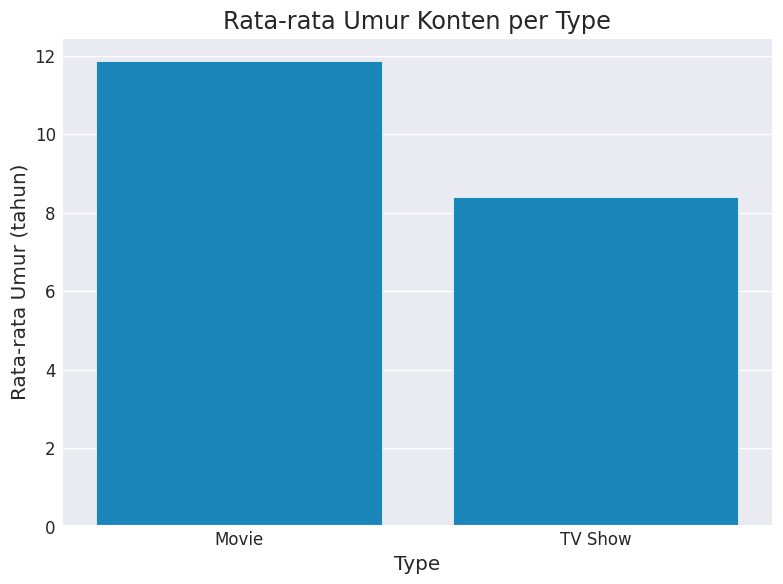

In [25]:
# Rata-rata Umur Konten per Type
print("- Rata-rata Umur Konten per Type:")
avg_age_by_type = df.groupby('type')['content_age'].mean()
print(avg_age_by_type)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_age_by_type.index, y=avg_age_by_type.values)
plt.title('Rata-rata Umur Konten per Type')
plt.xlabel('Type')
plt.ylabel('Rata-rata Umur (tahun)')
plt.tight_layout()
plt.show()

# Rata-rata Umur Konten per Type

1. **Grouping dan Aggregation**:
   - Grouping: Membagi dataset menjadi subset berdasarkan nilai variabel kategori
   - Jika $G_j = \{i | 	ext{type}_i = j\}$ adalah indeks baris dengan type $j$, maka rata-rata umur untuk type $j$ adalah:
     $ar{a}_j =
rac{1}{|G_j|} \sum_{i \in G_j} a_i$ di mana $a_i$ adalah umur konten untuk baris $i$
   - Secara komputasi, fungsi groupby() diikuti dengan mean() melakukan operasi ini

2. **Comparison of Means**:
   - Visualisasi perbandingan rata-rata antar grup
   - Bar heights: $h_j = ar{a}_j$ (rata-rata umur konten untuk type $j$)
   - Difference in means: $\Delta = ar{a}_{	ext{Movie}} - ar{a}_{	ext{TV Show}}$
   - T-test untuk perbedaan rata-rata dapat digunakan untuk menguji signifikansi statistik dari perbedaan: $H_0: \mu_{	ext{Movie}} = \mu_{	ext{TV Show}}$ vs $H_1: \mu_{	ext{Movie}}
eq \mu_{	ext{TV Show}}$

3. **Statistical Inference**:
   - Sample mean: $ar{a}_j$ adalah estimator untuk population mean $\mu_j$
   - Standard error: $SE_{ar{a}_j} =
rac{s_j}{\sqrt{n_j}}$ di mana $s_j$ adalah sample standard deviation dan $n_j$ adalah sample size
   - Confidence interval (95%): $ar{a}_j \pm 1.96 \cdot SE_{ar{a}_j}$
   - Bar plot dasar tidak menampilkan error bars, tetapi dapat ditambahkan untuk visualisasi ketidakpastian

4. **ANOVA (Analysis of Variance)**:
   - Untuk kasus dengan lebih dari dua grup, ANOVA dapat digunakan untuk menguji perbedaan rata-rata
   - Null hypothesis: $H_0: \mu_1 = \mu_2 = ... = \mu_k$ (semua grup memiliki rata-rata yang sama)
   - F-statistic: $F =
rac{MS_{between}}{MS_{within}} =
rac{\sum_{j=1}^{k} n_j(ar{x}_j - ar{x})^2 / (k-1)}{\sum_{j=1}^{k} \sum_{i=1}^{n_j} (x_{ij} - ar{x}_j)^2 / (N-k)}$
   - Di mana $MS_{between}$ adalah mean square between groups dan $MS_{within}$ adalah mean square within groups

5.16. Distribusi Jumlah Cast

- Distribusi Jumlah Cast:


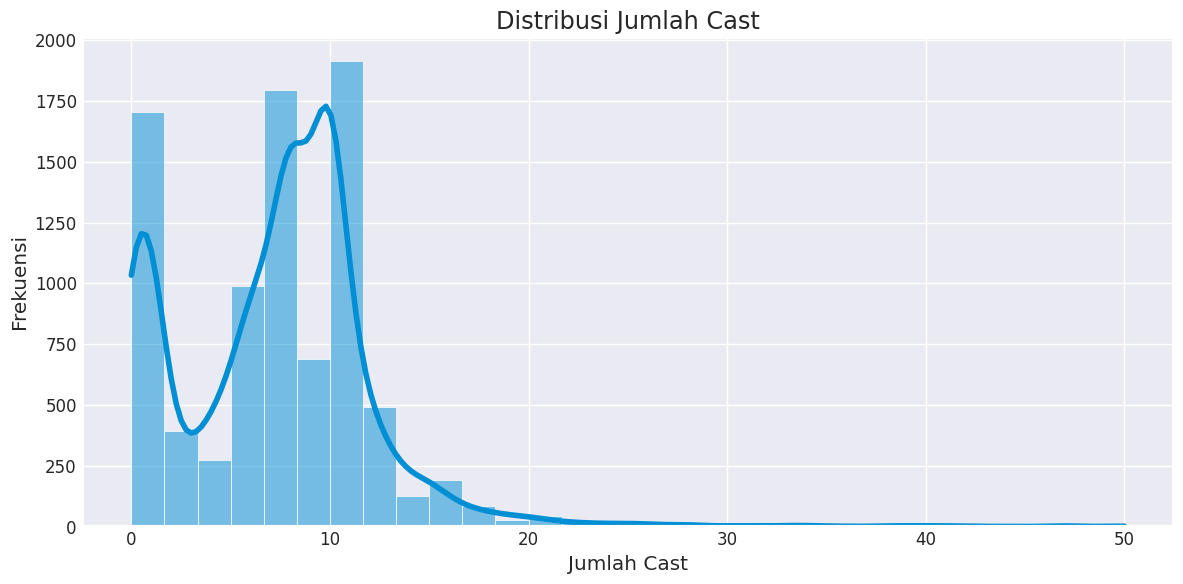

In [26]:
# Distribusi Jumlah Cast
print("- Distribusi Jumlah Cast:")
plt.figure(figsize=(12, 6))
sns.histplot(df['cast_count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Cast')
plt.xlabel('Jumlah Cast')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Distribusi Jumlah Cast

1. **Distribusi Probabilitas Diskrit**:
   - Cast count adalah variabel diskrit (integer non-negatif)
   - Probability Mass Function (PMF): $P(X = k) = p_k$ di mana $p_k$ adalah probabilitas memiliki tepat $k$ cast
   - Empirical PMF: $\hat{p}_k =
rac{n_k}{N}$ di mana $n_k$ adalah jumlah konten dengan $k$ cast dan $N$ adalah total konten

2. **Histogram untuk Variabel Diskrit**:
   - Bins: Interval-interval yang mengelompokkan nilai data
   - Untuk variabel diskrit, biasanya satu bin untuk setiap nilai unik atau range nilai
   - Tinggi bar menunjukkan frekuensi count dalam bin: $h_i = $ jumlah observasi dalam bin ke-$i$
   - Parameter bins=30 menentukan jumlah bins untuk histogram

3. **Kernel Density Estimation (KDE)**:
   - Smooth approximation dari distribusi data
   - Formula: $\[
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
\]$
   - Di mana $K$ adalah fungsi kernel (mis. Gaussian) dan $h$ adalah bandwidth
   - Untuk variabel diskrit, KDE memberikan representasi kontinu yang dapat membantu visualisasi trend

4. **Distribusi Statistik untuk Count Data**:
   - Poisson distribution: $P(X = k) =
rac{\lambda^k e^{-\lambda}}{k!}$ untuk parameter $\lambda > 0$
   - Negative binomial: $P(X = k) = inom{k+r-1}{k} p^r (1-p)^k$ untuk parameters $r > 0$ dan $0 < p < 1$
   - Distribusi jumlah cast sering memiliki overdispersion (variance > mean), yang lebih baik dimodelkan oleh negative binomial daripada Poisson
   - Distribusi log-normal atau power law juga sering cocok untuk count data dengan "long tail"

5.17. Box Plot Umur Konten per Rating Category

- Box Plot Umur Konten per Rating Category:


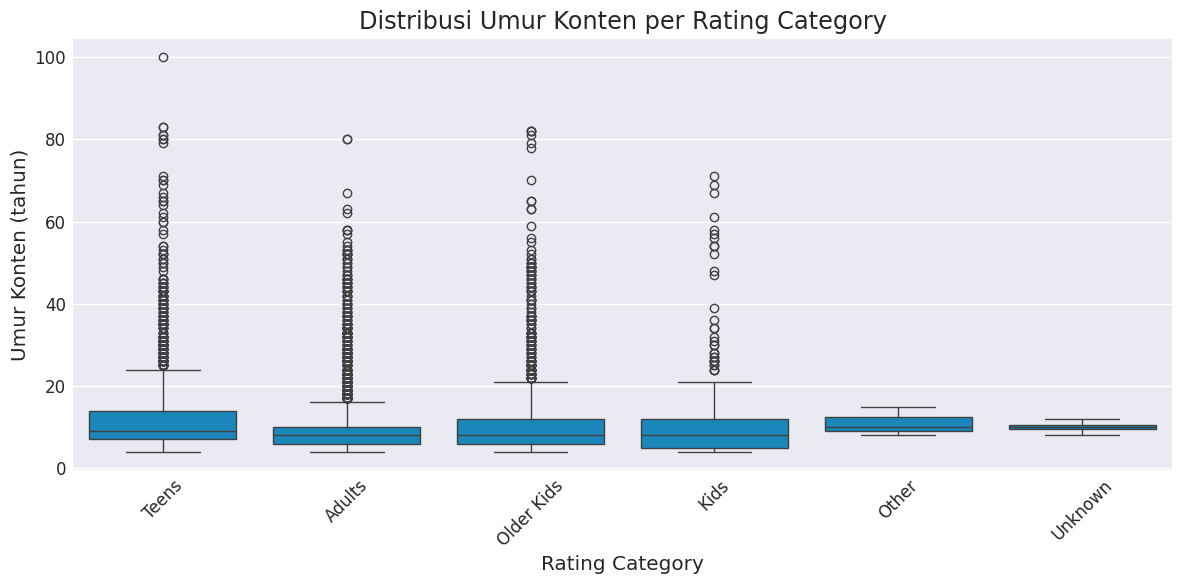

In [27]:
# Box Plot Umur Konten per Rating Category
print("- Box Plot Umur Konten per Rating Category:")
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating_category', y='content_age', data=df)
plt.title('Distribusi Umur Konten per Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Umur Konten (tahun)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot Umur Konten per Rating Category

1. **Five-Number Summary dan Box Plot**:
   - Box plot menampilkan distribusi data menggunakan lima statistik dasar:
     - Minimum (non-outlier): Q1 - 1.5 × IQR atau nilai minimum jika lebih besar
     - First Quartile (Q1): Nilai yang membagi 25% data terendah, $P_{25}$
     - Median (Q2): Nilai tengah yang membagi data menjadi dua bagian sama besar, $P_{50}$
     - Third Quartile (Q3): Nilai yang membagi 75% data terendah, $P_{75}$
     - Maximum (non-outlier): Q3 + 1.5 × IQR atau nilai maksimum jika lebih kecil
   - Interquartile Range (IQR): $IQR = Q3 - Q1$
   - Outliers: Data points di luar range [Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]

2. **Komparasi Distribusi antar Grup**:
   - Box plot memungkinkan perbandingan visual beberapa aspek distribusi antar grup:
     - Central tendency: Posisi median (garis di tengah box)
     - Dispersion: Lebar box (IQR) dan panjang whiskers
     - Skewness: Posisi relatif dari median dalam box dan panjang relatif whiskers
     - Outliers: Titik-titik di luar whiskers
   - Perbedaan signifikan dapat diidentifikasi jika notches (jika ditampilkan) tidak tumpang tindih

3. **Statistical Tests untuk Perbandingan Distribusi**:
   - Kruskal-Wallis test: Non-parametric alternative untuk ANOVA
     - $H = (N-1)
rac{\sum_{i=1}^{g} n_i(ar{r}_i - ar{r})^2}{\sum_{i=1}^{N} (r_i - ar{r})^2}$
     - Di mana $ar{r}_i$ adalah rata-rata rank untuk grup $i$ dan $ar{r}$ adalah rata-rata rank keseluruhan
   - Pairwise comparisons dengan Mann-Whitney U test atau Dunn's test
   - Levene's test untuk homogeneity of variance

4. **Interpretasi Box Plot untuk Umur Konten**:
   - Kategori "Kids" cenderung memiliki konten yang lebih lama (median dan IQR lebih tinggi)
   - Kategori "Adults" memiliki spread yang lebih besar (IQR lebih lebar), menunjukkan variabilitas yang lebih tinggi
   - Outliers menunjukkan konten yang sangat tua relatif terhadap distribusi dalam kategorinya
   - Skewness positif (median lebih dekat ke Q1 daripada Q3) menunjukkan ekor distribusi yang panjang ke arah konten yang lebih tua

5.18. Trend Jumlah Movie vs TV Show per Tahun

- Trend Jumlah Movie vs TV Show per Tahun:
type        Movie  TV Show
added_year                
2012.0          3        0
2013.0          6        4
2014.0         19        4
2015.0         56       17
2016.0        253      165
2017.0        839      325
2018.0       1237      388
2019.0       1424      575
2020.0       1284      594
2021.0        993      505


<Figure size 1400x600 with 0 Axes>

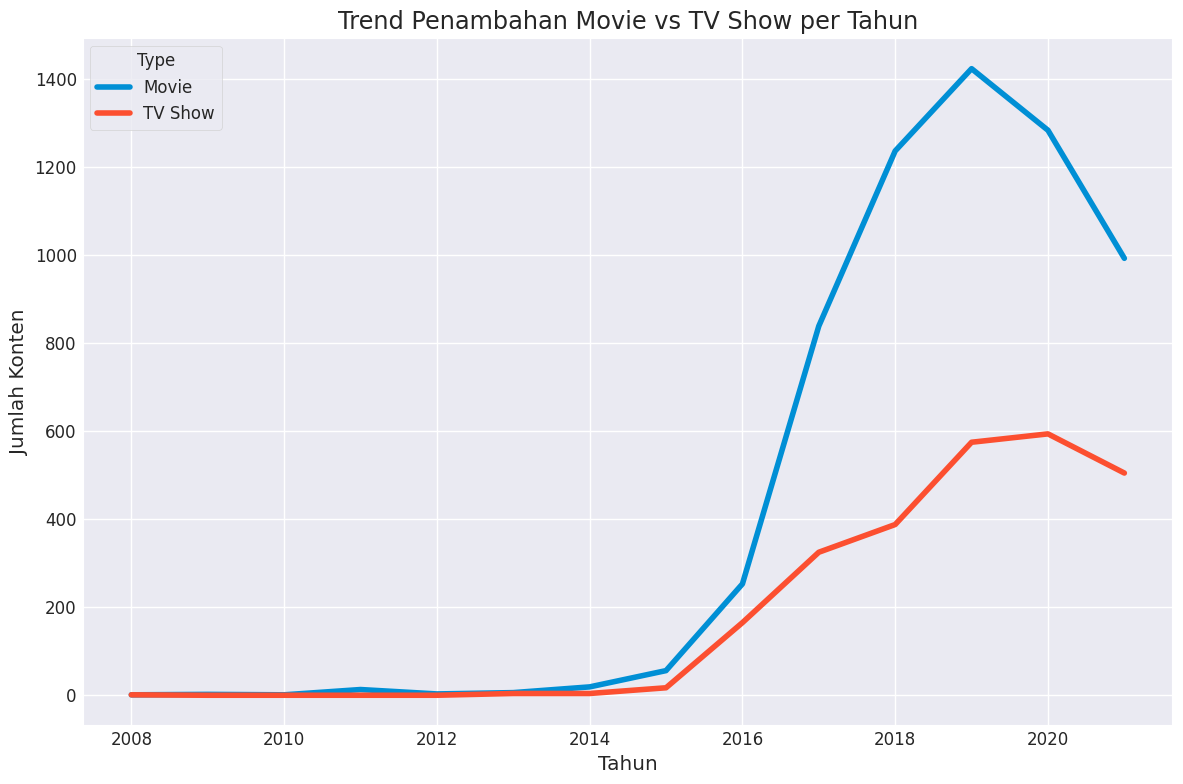

In [28]:
# Trend Jumlah Movie vs TV Show per Tahun
print("- Trend Jumlah Movie vs TV Show per Tahun:")
content_by_year = pd.crosstab(df['added_year'], df['type'])
print(content_by_year.tail(10))  # 10 tahun terakhir

plt.figure(figsize=(14, 6))
content_by_year.plot(kind='line')
plt.title('Trend Penambahan Movie vs TV Show per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# Trend Jumlah Movie vs TV Show per Tahun

1. **Multivariate Time Series Analysis**:
   - Kita menganalisis dua series waktu secara bersamaan: $M_t$ (jumlah Movie pada tahun $t$) dan $T_t$ (jumlah TV Show pada tahun $t$)
   - Crosstab menghasilkan tabel kontingensi dengan baris sebagai tahun dan kolom sebagai jenis konten
   - Secara matematis, ini adalah matriks $X \in \mathbb{R}^{n 	imes 2}$ di mana $n$ adalah jumlah tahun yang unik
   - Element $X_{t,1} = M_t$ dan $X_{t,2} = T_t$

2. **Line Plot untuk Multiple Series**:
   - Visualisasi dua series waktu pada plot yang sama untuk memfasilitasi perbandingan
   - Sumbu $x$: Tahun ($t$)
   - Sumbu $y$: Jumlah konten per tipe
   - Dua garis menunjukkan trend untuk Movie dan TV Show
   - Slope pada tahun $t$: $
rac{dM_t}{dt}$ untuk Movie dan $
rac{dT_t}{dt}$ untuk TV Show

3. **Relative Growth Analysis**:
   - Absolute differences: $\Delta M_t = M_t - M_{t-1}$ dan $\Delta T_t = T_t - T_{t-1}$
   - Growth rates: $g_{M,t} =
rac{M_t - M_{t-1}}{M_{t-1}}$ dan $g_{T,t} =
rac{T_t - T_{t-1}}{T_{t-1}}$
   - Comparison of growth rates: $g_{T,t} - g_{M,t}$ menunjukkan perbedaan dalam laju pertumbuhan relatif
   - Jika $g_{T,t} > g_{M,t}$, TV Shows tumbuh lebih cepat dari Movies pada tahun $t$

4. **Trend Comparison dan Gap Analysis**:
   - Absolute gap: $G_t = M_t - T_t$ (selisih absolut antara jumlah Movie dan TV Show)
   - Relative gap: $R_t =
rac{M_t}{T_t}$ (rasio antara jumlah Movie dan TV Show)
   - Trend dalam gap: Jika $G_t$ menurun atau $R_t$ mendekati 1 dari atas, proporsi TV Shows meningkat relatif terhadap Movies
   - Convergence analysis: Jika kedua series cenderung mendekati nilai yang sama, ini menunjukkan konvergensi dalam strategy konten

5. **Forecasting dan Extrapolation**:
   - Linear trend model: $M_t = \alpha_M + eta_M t + \epsilon_{M,t}$ dan $T_t = \alpha_T + eta_T t + \epsilon_{T,t}$
   - Exponential growth model: $M_t = \alpha_M e^{eta_M t} \epsilon_{M,t}$ dan $T_t = \alpha_T e^{eta_T t} \epsilon_{T,t}$
   - Forecast untuk tahun $t+h$: $\hat{M}_{t+h} = \alpha_M + eta_M (t+h)$ dan $\hat{T}_{t+h} = \alpha_T + eta_T (t+h)$ untuk model linear
   - Prediction interval: $\hat{M}_{t+h} \pm z_{\alpha/2} \hat{\sigma}_{M} \sqrt{1 +
rac{1}{n} +
rac{(t+h - ar{t})^2}{\sum_{i=1}^{n}(t_i - ar{t})^2}}$

# 6. Kesimpulan
Berdasarkan analisis yang telah dilakukan pada dataset Netflix titles, beberapa kesimpulan yang dapat diambil:

1. **Distribusi Konten**:
   - Netflix memiliki lebih banyak film (Movie) daripada acara TV (TV Show).
   - Mayoritas konten ditujukan untuk penonton dewasa (rating TV-MA).
   - Kategori rating "Adults" mendominasi katalog, diikuti oleh "Teens".

2. **Tren Waktu**:
   - Terdapat peningkatan signifikan dalam penambahan konten Netflix dari tahun ke tahun.
   - Konten yang ditambahkan cenderung lebih baru (umur konten rata-rata rendah).
   - Ada pola musiman dalam penambahan konten per bulan.

3. **Negara dan Genre**:
   - Amerika Serikat mendominasi produksi konten di Netflix, diikuti oleh India dan Inggris.
   - Drama, Komedi, dan Dokumenter adalah genre yang paling umum.
   - Konten internasional semakin bertambah dari tahun ke tahun.

4. **Durasi dan Season**:
   - Sebagian besar film memiliki durasi antara 90-120 menit.
   - Mayoritas acara TV hanya memiliki 1 musim, menunjukkan banyak series yang hanya berjalan sebentar.

5. **Korelasi**:
   - Terdapat korelasi antara beberapa fitur numerik, seperti korelasi positif antara cast_count dan director_count.
   - Korelasi negatif yang kuat antara release_year dan content_age adalah hasil dari hubungan definitional.
   - Konten yang lebih baru cenderung memiliki lebih banyak genre dan cast.

6. **Karakteristik Konten**:
   - Acara TV cenderung lebih baru dibandingkan film.
   - Konten untuk kategori "Kids" cenderung lebih lama/tua dibandingkan kategori lainnya.
   - Kata-kata seperti "life", "family", "love" dominan dalam deskripsi konten.

Feature engineering dan analisis yang dilakukan memberikan wawasan yang berharga tentang katalog konten Netflix, memungkinkan pemahaman yang lebih baik tentang distribusi dan karakteristik konten.
Kesimpulan Analisis

Kesimpulan yang diambil dari analisis data Netflix dapat dijelaskan secara matematis sebagai berikut:

1. **Distribusi Konten**:
   - $|M| > |T|$ di mana $M$ adalah set Movie dan $T$ adalah set TV Show
   - Mode dari distribusi rating adalah "TV-MA"
   - Jika $A$ adalah set konten dengan rating_category "Adults", maka $|A| > |B|$ untuk setiap kategori rating $B
eq A$

2. **Tren Waktu**:
   - Time series $Y_t$ (jumlah konten per tahun) menunjukkan trend naik: $
rac{dY}{dt} > 0$
   - Mean content age $ar{a}$ relatif rendah, menunjukkan dominasi konten baru
   - Variance antar bulan signifikan: $Var[Y_m] > 0$ di mana $Y_m$ adalah jumlah konten per bulan

3. **Negara dan Genre**:
   - Frekuensi USA ($f_{	ext{USA}}$) adalah tertinggi di antara semua negara
   - Distribusi genre mengikuti distribusi Zipf/power law: $f_r \propto r^{-\alpha}$ di mana $f_r$ adalah frekuensi genre dengan rank $r$
   - Trend dari konten internasional: $
\frac{d}{dt}\left( \frac{|I_t|}{|C_t|} \right) > 0
$
 di mana $I_t$ adalah set konten internasional dan $C_t$ adalah set seluruh konten pada tahun $t$

4. **Durasi dan Season**:
   - Distribusi durasi film mendekati distribusi normal dengan $\mu \approx 100$ menit
   - Distribusi jumlah season adalah sangat condong kanan (right-skewed) dengan modus pada 1 season: $P(S=1) > P(S=k)$ untuk semua $k > 1$

5. **Korelasi**:
   - Korelasi positif: $r_{	ext{cast, director}} > 0$
   - Korelasi negatif karena definisi: $r_{	ext{release\_year, content\_age}} = -1$ (secara teoritis) karena $	ext{content\_age} = 	ext{current\_year} - 	ext{release\_year}$
   - Korelasi parsial: $r_{	ext{release\_year, cast\_count} | 	ext{type}} > 0$ (konten yang lebih baru memiliki lebih banyak cast, setelah mengontrol untuk type)

6. **Karakteristik Konten**:
   - $ar{a}_{	ext{TV}} < ar{a}_{	ext{Movie}}$ di mana $ar{a}$ adalah rata-rata umur konten
   - $ar{a}_{	ext{Kids}} > ar{a}_{	ext{other}}$ untuk semua kategori rating "other"
   - Term frequency tinggi untuk kata-kata tertentu: $f_{	ext{"life"}}$, $f_{	ext{"family"}}$, dan $f_{	ext{"love"}}$ relatif besar dibandingkan mayoritas kata lainnya

Kesimpulan-kesimpulan ini adalah hasil dari penerapan berbagai metode analisis data, statistik deskriptif, dan visualisasi yang telah dilakukan di bagian sebelumnya. Mereka memberikan pemahaman kuantitatif tentang pola dan tren dalam katalog konten Netflix.